In [1]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time

tf.initialize(tf.cpu, "-O2 -ffast-math -fopenmp")

S = 2048

def mandelbrot():
    canvas = tf.zeros([S, S, 3], tf.float32)
    i, j = tf.indices([S, S])
    y, x = tf.float(i), tf.float(j)

    z_re = tf.zeros([S, S], tf.float32)
    z_im = tf.zeros([S, S], tf.float32)
    c_re = x * (2.0 / S) - 1.5
    c_im = y * (2.0 / S) - 1.0

    def loop_body(k):
        z_re_new = z_re*z_re - z_im*z_im + c_re
        z_im_new = 2.0*z_re*z_im + c_im
        z_re.set(tf.clamp(z_re_new, -4.0, 4.0))
        z_im.set(tf.clamp(z_im_new, -4.0, 4.0))
         
    tf.loop(loop_body, 0, 32, 1)

    z_mag = tf.sqrt(z_re*z_re + z_im*z_im)

    canvas[i, j, 0] = tf.abs(z_re)*z_mag
    canvas[i, j, 1] = tf.abs(z_im)*z_mag
    canvas[i, j, 2] = z_mag

    return [canvas]

mand = tf.compile(mandelbrot)
res = mand()
resnp = res[0].numpy
print(resnp.shape)

TensorFrost module loaded!
TensorProgram:
  Kernel count: 3
  Intermediate buffers: 1
  Lines of generated code: 292
  IR size: 120

(2048, 2048, 3)


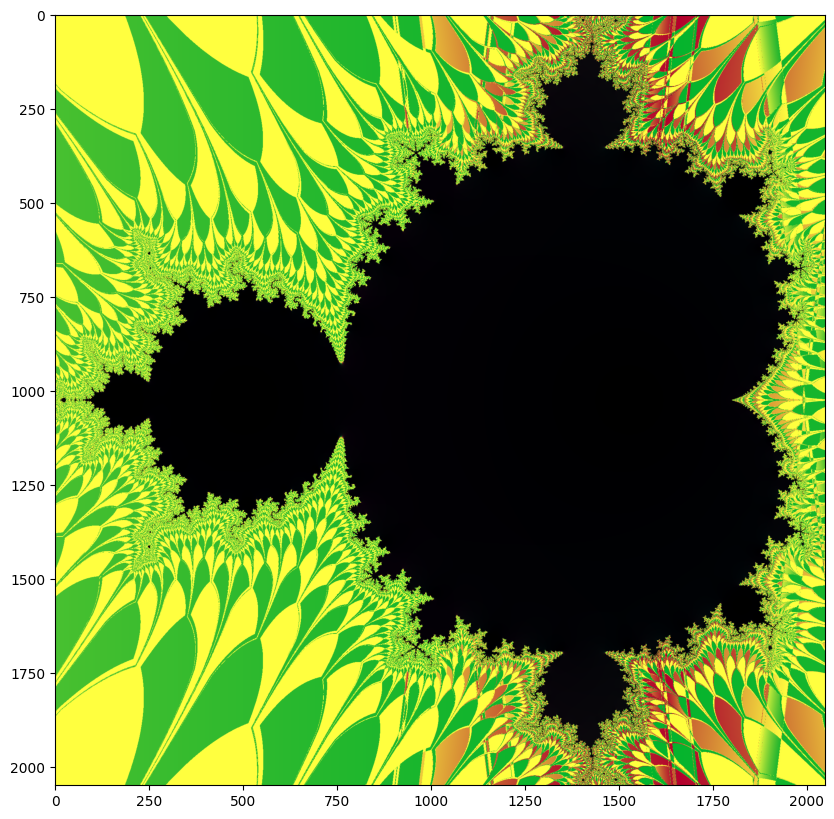

In [2]:
# plot the result
plt.figure(figsize=(10,10))
plt.imshow(resnp/np.max(resnp))
plt.show()